## 탐색 및 전처리
### 1. 각 공정별 주요 인자 탐색

#### 데이터 분석에 필요한 라이브러리

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### os 라이브러리 활용 팁

In [12]:
import os

In [15]:
path = os.getcwd()  # 현재 작업 디렉터리의 경로

path

'c:\\Source\\data-analysis\\semiconductor'

In [19]:
name_list = os.listdir(path + './dataset')    #  주어진 디렉터리 경로에서 파일 및 서브 디렉터리의 목록
name_list

['Etching_000.csv',
 'Implant_000.csv',
 'Inspect_000.csv',
 'Oxid_000.csv',
 'Photo_lithography_000.csv',
 'Photo_Softbake_000.csv']

In [20]:
for i in name_list:
    if 'csv' in i:  # 데이터 파일이 많은 경우 csv 파일 확인 팁
        print(i)

Etching_000.csv
Implant_000.csv
Inspect_000.csv
Oxid_000.csv
Photo_lithography_000.csv
Photo_Softbake_000.csv


#### 파일 읽어오기

In [11]:
df1_oxdi=pd.read_csv('./dataset/Oxid_000.csv')

df1_oxdi

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,NOLSM8483211,32,11,17-02-2019 PM 9:04:30
848,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,NOLSM8493212,32,12,17-02-2019 PM 9:04:30
849,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,NOLSM8503213,32,13,17-02-2019 PM 9:04:30
850,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,NOLSM8513214,32,14,17-02-2019 PM 9:04:30


#### 데이터에서 확인해야하는 것
- 데이터 구조 : 데이터의 개수 / 항목
- 데이터 타입 : 각 항목의 데이터 타입(연속형 / 범주형)
- 기술통계량 :
    - 연속형 : 대표값 / 산포 / 분포의 모양 / 결측치
        - 대표값 : 평균 / 중앙값
            A : 2, 3, 1, 4, 5       평균
              : 1, 2, 3, 4, 5       중앙값 3

            B : 2, 3, 1 ,4, 1000    평균 약 200
              : 1, 2, 3, 4, 1000    중앙값 3

        - 산포: 표준편차 / 최소값 / 최대값 -> 데이터 신뢰성
        - 분포의 모양 : 정규 분포
        - 결측치 (Missing Value) 확인

    - 범주형 : 각 항목의 빈도수 / 결측치

In [24]:
df1_oxdi.info() # 간단한 정보를 출력
# int64 : 정수형 / float64 : 실수형 / object : 범주형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ox_Chamber  852 non-null    int64  
 1   process     852 non-null    object 
 2   type        852 non-null    object 
 3   Temp_OXid   852 non-null    float64
 4   Vapor       852 non-null    object 
 5   ppm         852 non-null    float64
 6   Pressure    852 non-null    float64
 7   Oxid_time   852 non-null    int64  
 8   thickness   852 non-null    float64
 9   No_Die      852 non-null    object 
 10  Lot_Num     852 non-null    int64  
 11  Wafer_Num   852 non-null    int64  
 12  Datetime    852 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 86.7+ KB


#### 숫자 데이터 기술통계량

In [27]:
df1_oxdi.describe()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000


[결과]  
평균과 중앙값 차이 확인 / 표준편차가 큰 것 확인 / 이상치 확인

<Axes: xlabel='Temp_OXid', ylabel='Count'>

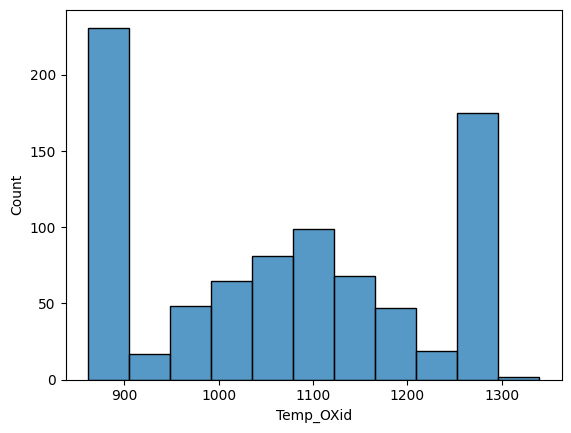

In [29]:
sns.histplot(data=df1_oxdi, x='Temp_OXid')  # 히스토그램

[결과]   
정규분포를 띄지 않음. 타입에 따라 층별화 하여 확인하기

<Axes: xlabel='Temp_OXid', ylabel='Count'>

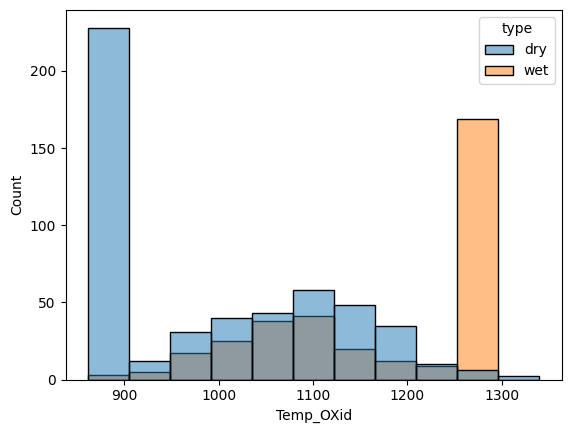

In [31]:
sns.histplot(data=df1_oxdi, x='Temp_OXid', hue='type')  # 층별화


층별화 결과 dry는 약900도 / wet은 약1300도 데이터가 정상임을 알 수 있음

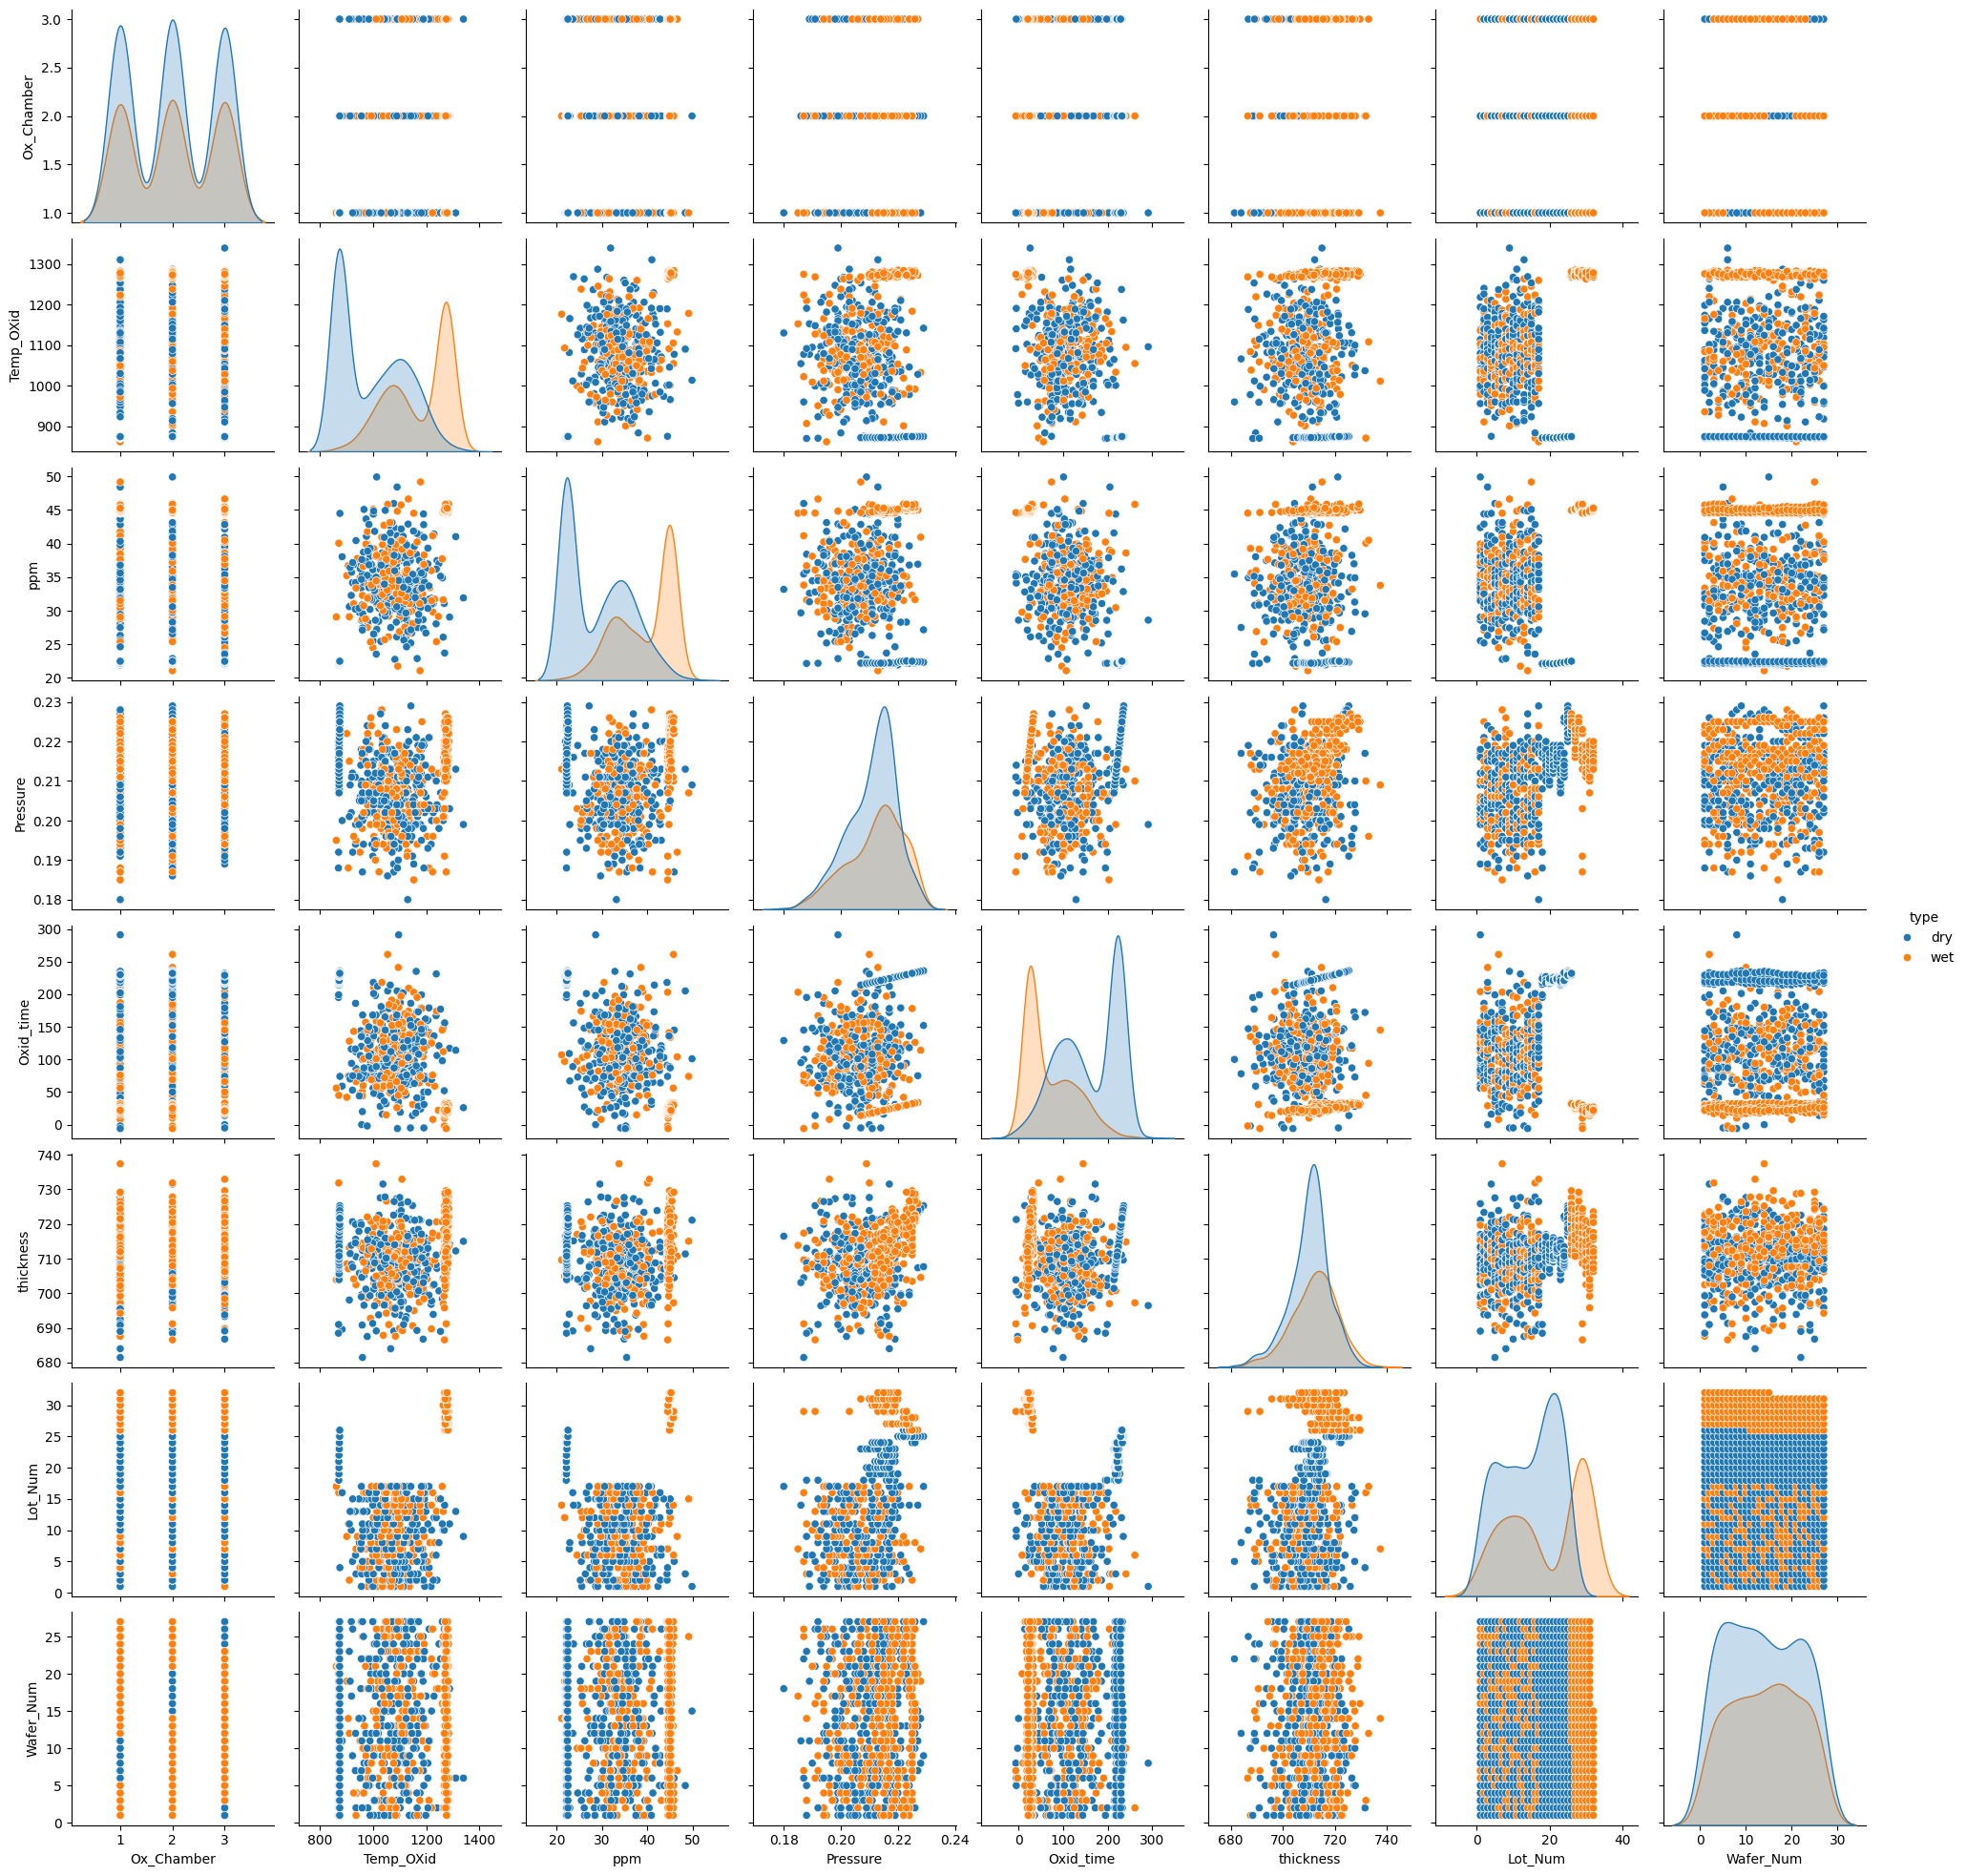

In [34]:
# 모든 숫자 데이터의 층별화 / 히스토그램 + 산점도
sns.pairplot(data=df1_oxdi, hue='type')
plt.savefig('image_oxidation.png')  # 이미지 저장

#### 문자데이터 기술통계량(빈도수)

In [37]:
df1_oxdi['type'].value_counts()

type
dry    513
wet    339
Name: count, dtype: int64

In [38]:
df1_oxdi['Vapor'].value_counts()

Vapor
O2     513
H2O    339
Name: count, dtype: int64

In [40]:
df1_oxdi['Ox_Chamber'].value_counts()

Ox_Chamber
2    290
1    281
3    281
Name: count, dtype: int64

<Axes: xlabel='Ox_Chamber', ylabel='count'>

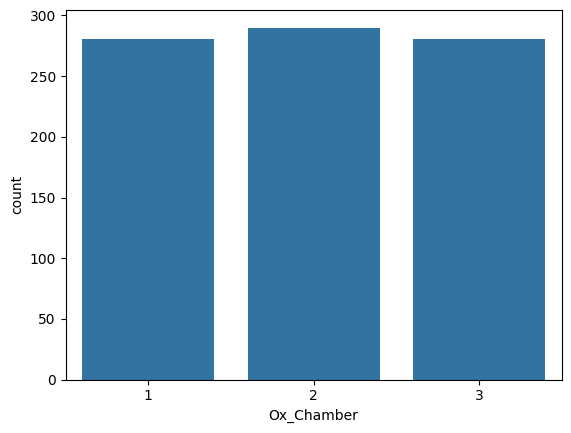

In [45]:
sns.countplot(data=df1_oxdi, x='Ox_Chamber') # 범주형 데이터 시각화 

#### 결측치 확인

In [46]:
df1_oxdi.isnull().sum()

Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
No_Die        0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64